# Predicting Rent Prices Based on Unit/House Data
*Exploratory Data Analysis, Data Processing, Model Development, and Model Deployment by Charles Selden*
***

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import chi2_contingency
import researchpy as rp

***

## Importing the Dataset

In [2]:
data = pd.read_csv("~/Documents/data/house_data/House_Rent_Dataset.csv")
columns = list(data.columns)

In [3]:
column_to_description = {}

descriptions_temp = ["Posted On: The date on which the house listing was posted.",
"BHK: Number of Bedrooms, Hall, Kitchen.",
"Rent: Rent of the Houses/Apartments/Flats.",
"Size: Size of the Houses/Apartments/Flats in Square Feet.",
"Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)",
"Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.",
"Area Locality: Locality of the Houses/Apartments/Flats.",
"City: City where the Houses/Apartments/Flats are Located.",
"Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.",
"Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.",
"Bathroom: Number of Bathrooms.",
"Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats."]

for i in range(len(list(data.columns))):
    column_to_description[columns[i]] = descriptions_temp[i]
                                  
for i in columns:
    print(column_to_description[i])

Posted On: The date on which the house listing was posted.
BHK: Number of Bedrooms, Hall, Kitchen.
Rent: Rent of the Houses/Apartments/Flats.
Size: Size of the Houses/Apartments/Flats in Square Feet.
Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
Area Locality: Locality of the Houses/Apartments/Flats.
City: City where the Houses/Apartments/Flats are Located.
Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
Bathroom: Number of Bathrooms.
Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


***

# Exploring the Dataset

## Posted On

In [4]:
print(column_to_description["Posted On"],"\n")
print(data["Posted On"],"\n")
posted_counts = data["Posted On"].value_counts()
print(posted_counts)

Posted On: The date on which the house listing was posted. 

0       2022-05-18
1       2022-05-13
2       2022-05-16
3       2022-07-04
4       2022-05-09
           ...    
4741    2022-05-18
4742    2022-05-15
4743    2022-07-10
4744    2022-07-06
4745    2022-05-04
Name: Posted On, Length: 4746, dtype: object 

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64


#### Maybe convert dates to int representing time since first listed date/start of 2020

## BHK

In [5]:
print(column_to_description["BHK"],"\n")
print(data["BHK"],"\n")
print(data["BHK"].value_counts())

BHK: Number of Bedrooms, Hall, Kitchen. 

0       2
1       2
2       2
3       2
4       2
       ..
4741    2
4742    3
4743    3
4744    3
4745    2
Name: BHK, Length: 4746, dtype: int64 

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64


#### Simple, works in current form

## Rent

In [6]:
print(column_to_description["Rent"],"\n")
print(data["Rent"])

Rent: Rent of the Houses/Apartments/Flats. 

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


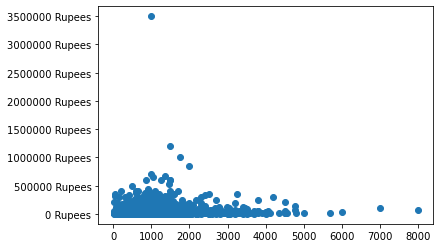

In [7]:
plt.scatter(data["Size"],np.sort(data["Rent"]))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f Rupees'))

*Lets put a limit on the y axis to ignore the extreme outliers.*

(0.0, 600000.0)

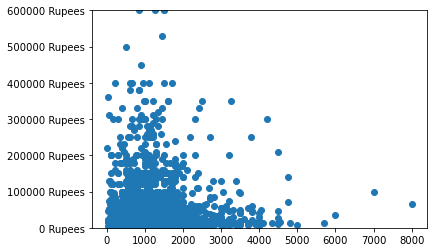

In [8]:
plt.scatter(data["Size"],np.sort(data["Rent"]))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f Rupees'))
plt.ylim(0,600000)

*As a scalar value, it's easy to use. Our y value, what we want to predict using the model. A few extremely high outliers, but the majority values are under 100,000 and an even larger majority are under 400,000*

## Size

In [9]:
print(column_to_description["Size"],"\n")
print(data["Size"])

Size: Size of the Houses/Apartments/Flats in Square Feet. 

0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64


*In square feet, makes using much easier than a categorical version.*

## Floor

In [10]:
print(column_to_description["Floor"],"\n")
print(data["Floor"],"\n")
print(data["Floor"].value_counts())

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.) 

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object 

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64


*Actual values are scalar but in a string format, split into two seperate columns for the floor the room is on as well as the total number of floors the place has.*

## Area Type

In [11]:
print(column_to_description["Area Type"],"\n")
print(data["Area Type"],"\n")
print(data["Area Type"].value_counts())

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area. 

0        Super Area
1        Super Area
2        Super Area
3        Super Area
4       Carpet Area
           ...     
4741    Carpet Area
4742     Super Area
4743    Carpet Area
4744    Carpet Area
4745    Carpet Area
Name: Area Type, Length: 4746, dtype: object 

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64


*Super area includes sq feet for areas the tenant will have access to outside his apartment/house (stairways, public areas, hallways), while carpet area is just the apartment or house itself.*

## Area Locality

In [12]:
print(column_to_description["Area Locality"],"\n")
print(data["Area Locality"],"\n")
print(data["Area Locality"].value_counts())

Area Locality: Locality of the Houses/Apartments/Flats. 

0                         Bandel
1       Phool Bagan, Kankurgachi
2        Salt Lake City Sector 2
3                    Dumdum Park
4                  South Dum Dum
                  ...           
4741                Bandam Kommu
4742        Manikonda, Hyderabad
4743        Himayath Nagar, NH 7
4744                  Gachibowli
4745             Suchitra Circle
Name: Area Locality, Length: 4746, dtype: object 

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, L

(array([496., 499., 301., 332., 551., 430., 379., 769., 644., 345.]),
 array([   0. ,  223.4,  446.8,  670.2,  893.6, 1117. , 1340.4, 1563.8,
        1787.2, 2010.6, 2234. ]),
 <BarContainer object of 10 artists>)

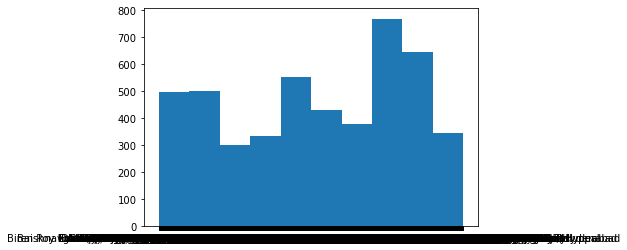

In [13]:
plt.hist(data["Area Locality"])

*Too many categorical variables with only a few data points to one-hot encode or label encode, just use city instead.*

## City

In [14]:
print(column_to_description["City"],"\n")
print(data["City"],"\n")
print(data["City"].value_counts())

City: City where the Houses/Apartments/Flats are Located. 

0         Kolkata
1         Kolkata
2         Kolkata
3         Kolkata
4         Kolkata
          ...    
4741    Hyderabad
4742    Hyderabad
4743    Hyderabad
4744    Hyderabad
4745    Hyderabad
Name: City, Length: 4746, dtype: object 

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64


*To be used instead of Locality, the issue of how to encode this categorical data is still a concern. Forgot that one-hot encoding created a column for each value which have binary values, this definitely is the best encoding scheme to use here.*

## Furnishing Status

In [15]:
print(column_to_description["Furnishing Status"],"\n")
print(data["Furnishing Status"],"\n")
print(data["Furnishing Status"].value_counts())

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished. 

0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4741    Semi-Furnished
4742    Semi-Furnished
4743    Semi-Furnished
4744    Semi-Furnished
4745       Unfurnished
Name: Furnishing Status, Length: 4746, dtype: object 

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64


*Categorical Data but seems like it would likely perform well if label-encoded as the categories are a scale from Unfurnished  through Furnished. Just need to make sure that unfurnished = 0, semi-furnished = 1, and furnished = 2.*

## Tenant Preferred

In [16]:
print(column_to_description["Tenant Preferred"],"\n")
print(data["Tenant Preferred"],"\n")
print(data["Tenant Preferred"].value_counts())

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent. 

0       Bachelors/Family
1       Bachelors/Family
2       Bachelors/Family
3       Bachelors/Family
4              Bachelors
              ...       
4741    Bachelors/Family
4742    Bachelors/Family
4743    Bachelors/Family
4744              Family
4745           Bachelors
Name: Tenant Preferred, Length: 4746, dtype: object 

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64


*Potentially able to use one-hot encoding for this, but might not give as much information as it potentially could.*

## Bathroom

In [17]:
print(column_to_description["Bathroom"],"\n")
print(data["Bathroom"],"\n")
print(data["Bathroom"].value_counts())

Bathroom: Number of Bathrooms. 

0       2
1       1
2       1
3       1
4       1
       ..
4741    2
4742    3
4743    3
4744    2
4745    2
Name: Bathroom, Length: 4746, dtype: int64 

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64


*No problem to use, simple scalar integer value.*

## Point of Contact

In [18]:
print(column_to_description["Point of Contact"],"\n")
print(data["Point of Contact"], "\n")
print(data["Point of Contact"].value_counts())

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats. 

0       Contact Owner
1       Contact Owner
2       Contact Owner
3       Contact Owner
4       Contact Owner
            ...      
4741    Contact Owner
4742    Contact Owner
4743    Contact Agent
4744    Contact Agent
4745    Contact Owner
Name: Point of Contact, Length: 4746, dtype: object 

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64


*Maybe remove contact builder since with just one data point we can't learn how this factors into the regression robustly.*
***

# Checking for Missing Values

In [19]:
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Floor: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0


*There are no missing values in this dataset.*

***

# Data Engineering and Processing

## Steps to be taken based on EDA:
1. `Posted On`: Convert Date to time since start of 2022.
2. `Size`: Maybe scale this using *Area Type* if it doesn't work well in the regression elsewise. For now having *Area Type* as a label-encoded variable which learns a flat value to adjust the outcome by might be fine, but the difference between different *Size*s will vary as some super-areas will severely overestimate *Size* and some will only minimally overestimate *Size*.
3. `Floor`: One of two options seems optimal. Both involve splitting the active floor and the total floors given the building first. The first option is just having both of those as seperate columns, the second option involves the floor the unit is on as the first column, and the ratio of that to the total floors in the building as the second.
The first option seems like the data is presented more clearly, but the second allows the relationship between the two to be passed directly in, as learning that might be suboptimal in terms of limiting learning other relationships. Call these columns *On Floor* and *Building Floors* in either case.
4. `Area Type`: If used to scale *Size* then don't use this column, otherwise use binary one-hot encoding for *Carpet Area* and *Super Area*, and throw out *Built Area* as that only has two data points.
5. `City`: This needs to be one-hot encoded, definitely good in this case as there are only a small number of cities with decent data population for each. 
6. `Furnishing Status`: Label encode with the following system. *Unfurnished* = 0, *Semi-Furnished* = 1, *Furnished* = 2.
7. `Tenant Preferred`: Do a kind of custom one-hot encoding. Normally each value would get its own column, but here we can just make two instead of three as one just represents both of the previous options simultaneously.
8. `Point of Contact`: Just drop the *Contact Builder* as it only has a single data point, the other two can be label encoded with 0 and 1.

***
## Taking these Steps

### Initial Data Shape

In [20]:
data.shape

(4746, 12)

### Step One - Making a Function to Update Posted On

In [21]:
posted_on_temp = data["Posted On"]
posted_on_temp

0       2022-05-18
1       2022-05-13
2       2022-05-16
3       2022-07-04
4       2022-05-09
           ...    
4741    2022-05-18
4742    2022-05-15
4743    2022-07-10
4744    2022-07-06
4745    2022-05-04
Name: Posted On, Length: 4746, dtype: object

*First we can check whether all the dates start in 2022, this same method can be applied using whatever year is the earliest date in the dataset.*

In [22]:
split_dates = []

for i in range(len(posted_on_temp)):
    split_dates.append(posted_on_temp[i].split("-"))
    
    if split_dates[i][0] != "2022":
        print("diff date",split_dates[i])

*Since all the data is from 2022, we will set 2022-01-01 to be 0, and every day past will increment.*

*First we need some way to tell the number of days in a month given the month and year.*

In [23]:
def numberOfDays(y, m):
      leap = 0
      if y% 400 == 0:
         leap = 1
      elif y % 100 == 0:
         leap = 0
      elif y% 4 == 0:
         leap = 1
      if m==2:
         return 28 + leap
      list = [1,3,5,7,8,10,12]
      if m in list:
         return 31
      return 30

*Now we can build our update function.*

In [24]:
def updatePostedOnToScalar(data):
    list_of_date_num_equivalent = []    
    
    for i in range(len(split_dates)):
        date_num_equivalent = 0
        
        for j in range(int(split_dates[i][1])):
            date_num_equivalent = date_num_equivalent + numberOfDays(int(split_dates[i][0]),j)
            
        date_num_equivalent = date_num_equivalent + int(split_dates[i][2])
        
        list_of_date_num_equivalent.append(date_num_equivalent)
        
    list_of_date_num_equivalent = np.array(list_of_date_num_equivalent)
        
    data["Posted On"] = list_of_date_num_equivalent

    return data

### Step Two - Making a Function to Adjust Size if Necessary
*Nothing necessary here so far.*

### Step Three - Making a Function to Split Floor Column

In [25]:
def splitFloorIntoTwo(data):
    original_floor = data["Floor"]
    floor_on = []
    floor_out_of = []
    for i in range(len(original_floor)):
        split = original_floor[i].split(" out of ")
        if len(split) == 1:
            if split[0] == 'Ground':
                floor_on.append(0)
                floor_out_of.append(0)
            else:
                floor_on.append(split[0])
                floor_out_of.append(split[0])
        else:  
            #Ground is 0, others are basement and such so all other non-int convertables go to -1
            if split[0] == 'Ground':
                floor_on.append(0)
            else:
                try:
                    floor_on.append(int(split[0]))
                except:
                    floor_on.append(-1)
            floor_out_of.append(int(split[1]))
    
    floor_on = np.array(floor_on)
    floor_out_of = np.array(floor_out_of)
    
    data["Floor On"] = floor_on
    data["Floor Out Of"] = floor_out_of

    data.drop("Floor",axis=1,inplace=True)

    return data

### Step Four - Making a Function to Label Encode a Given Column

In [26]:
def labelEncodeColumn(data,column_name):
    if column_name == "Furnishing Status":
        cat_type = CategoricalDtype(categories=["Unfurnished", "Semi-Furnished", "Furnished"], ordered=True)
        data[column_name] = data[column_name].astype(cat_type)
        data[column_name] = data[column_name].cat.codes
    else:
        data[column_name] = data[column_name].astype('category')
        data[column_name] = data[column_name].cat.codes

    return data

### Step Five - Making a Function to One-Hot Encode a Given Column

In [27]:
def oneHotEncodeColumn(data,column_name):
    encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
    if column_name == "Tenant Preferred":
        bachelors = []
        family = []
        for i in range(len(data["Tenant Preferred"])):
            if data["Tenant Preferred"][i] == "Bachelors":
                bachelors.append(1)
                family.append(0)
            elif data["Tenant Preferred"][i] == "Family":
                bachelors.append(0)
                family.append(1)
            elif data["Tenant Preferred"][i] == "Bachelors/Family":
                bachelors.append(1)
                family.append(1)
            else:
                print("issue w tenant preferred encoding")
        bachelors = pd.Series(bachelors)
        bachelors.name = "Bachelors"
        family = pd.Series(family)
        family.name = "Family"

        data = pd.concat([data,bachelors,family],axis=1)

        return data

    else:
        encoded_data = pd.DataFrame(encoder.fit_transform(data[[column_name]]))

        feature_names = encoder.get_feature_names_out()
        for i in range(len(feature_names)):
            feature_names[i] = feature_names[i].split("_")
        for i in range(len(feature_names)):
            feature_names[i] = feature_names[i][1]

        encoded_data.columns = feature_names

        data = pd.concat([data,encoded_data],axis=1)

    return data

***
## Processing the Data for Training our Model

In [28]:
data.shape

(4746, 12)

In [29]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

## Step One - Update Posted On to Scalar Values

In [30]:
data["Posted On"]

0       2022-05-18
1       2022-05-13
2       2022-05-16
3       2022-07-04
4       2022-05-09
           ...    
4741    2022-05-18
4742    2022-05-15
4743    2022-07-10
4744    2022-07-06
4745    2022-05-04
Name: Posted On, Length: 4746, dtype: object

In [31]:
data = updatePostedOnToScalar(data)

In [32]:
data["Posted On"]

0       168
1       163
2       166
3       215
4       159
       ... 
4741    168
4742    165
4743    221
4744    217
4745    154
Name: Posted On, Length: 4746, dtype: int64

*Check that the update didn't create any null values unintentionally.*

In [33]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Floor: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0


### Step Two - Adjust Size *(if necessary)*

### Step Three - Split Floor Column into Floor On and Floor Out Of

In [34]:
data["Floor"]

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object

In [35]:
data = splitFloorIntoTwo(data)

In [36]:
data["Floor On"].value_counts()

1     1161
2      945
0      927
3      512
4      272
5      164
6       93
7       74
10      67
8       66
9       65
12      47
11      43
15      41
-1      34
14      34
18      26
17      22
16      21
19      16
13      15
20      12
25      12
23       9
24       6
21       6
30       5
34       4
28       4
27       3
26       3
32       3
60       3
65       3
35       3
22       3
48       2
53       2
45       2
36       2
40       2
29       1
50       1
49       1
39       1
46       1
41       1
44       1
33       1
37       1
47       1
43       1
76       1
Name: Floor On, dtype: int64

In [37]:
data["Floor Out Of"].value_counts()

4     938
3     915
2     868
5     422
1     335
     ... 
39      1
62      1
59      1
66      1
0       1
Name: Floor Out Of, Length: 67, dtype: int64

*Check that the update didn't create any null values unintentionally.*

In [38]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0


### Step Four - Encode Area Type

*First we need to drop Built Area as it has too few data points.*

In [39]:
data['Area Type']

0        Super Area
1        Super Area
2        Super Area
3        Super Area
4       Carpet Area
           ...     
4741    Carpet Area
4742     Super Area
4743    Carpet Area
4744    Carpet Area
4745    Carpet Area
Name: Area Type, Length: 4746, dtype: object

In [40]:
data = data.drop(data[data['Area Type'] == 'Built Area'].index)
data['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Name: Area Type, dtype: int64

In [41]:
data = data.reset_index()
data

,index,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor On,Floor Out Of
0,0,168,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,1,163,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,166,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,3,215,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,4,159,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,4741,168,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4740,4742,165,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4741,4743,221,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4742,4744,217,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [42]:
data.shape

(4744, 14)

*Check that dropping rows didn't create any null values unintentionally.*

In [43]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

index: 0
Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0


*We can label encode into two categories after having dropped Built Area. Since there are only two potential categories, we don't need to worry about ordinality of the categories.*

In [44]:
data['Area Type']

0        Super Area
1        Super Area
2        Super Area
3        Super Area
4       Carpet Area
           ...     
4739    Carpet Area
4740     Super Area
4741    Carpet Area
4742    Carpet Area
4743    Carpet Area
Name: Area Type, Length: 4744, dtype: object

In [45]:
data = labelEncodeColumn(data,'Area Type')
data['Area Type']

0       1
1       1
2       1
3       1
4       0
       ..
4739    0
4740    1
4741    0
4742    0
4743    0
Name: Area Type, Length: 4744, dtype: int8

*Check that the update didn't create any null values unintentionally.*

In [46]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

index: 0
Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Area Locality: 0
City: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0


### Step Five - One-Hot Encoding for City

In [47]:
data['City']

0         Kolkata
1         Kolkata
2         Kolkata
3         Kolkata
4         Kolkata
          ...    
4739    Hyderabad
4740    Hyderabad
4741    Hyderabad
4742    Hyderabad
4743    Hyderabad
Name: City, Length: 4744, dtype: object

In [48]:
data = oneHotEncodeColumn(data,'City')

In [49]:
data = data.drop("City",axis=1)
data = data.drop("Area Locality",axis=1)

In [50]:
data

,index,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,0,168,2,10000,1100,1,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,0.0,0.0,0.0,0.0,1.0,0.0
1,1,163,2,20000,800,1,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0
2,2,166,2,17000,1000,1,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0
3,3,215,2,10000,800,1,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0
4,4,159,2,7500,850,0,Unfurnished,Bachelors,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,4741,168,2,15000,1000,0,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,0.0,0.0,0.0,1.0,0.0,0.0
4740,4742,165,3,29000,2000,1,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,0.0,0.0,0.0,1.0,0.0,0.0
4741,4743,221,3,35000,1750,0,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,0.0,0.0,0.0,1.0,0.0,0.0
4742,4744,217,3,45000,1500,0,Semi-Furnished,Family,2,Contact Agent,23,34,0.0,0.0,0.0,1.0,0.0,0.0


*Check that the update didn't create any null values unintentionally.*

In [51]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

index: 0
Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0
Bangalore: 0
Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0


### Step Six - Label *(or maybe ordinal)* Encode Furnishing Status

In [52]:
data['Furnishing Status']

0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4739    Semi-Furnished
4740    Semi-Furnished
4741    Semi-Furnished
4742    Semi-Furnished
4743       Unfurnished
Name: Furnishing Status, Length: 4744, dtype: object

In [53]:
data = labelEncodeColumn(data,'Furnishing Status')
data['Furnishing Status']

0       0
1       1
2       1
3       0
4       0
       ..
4739    1
4740    1
4741    1
4742    1
4743    0
Name: Furnishing Status, Length: 4744, dtype: int8

*Check that the update didn't create any null values unintentionally.*

In [54]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

index: 0
Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Furnishing Status: 0
Tenant Preferred: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0
Bangalore: 0
Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0


### Step Seven - One-Hot Encode Tenant Preferred *(with bachelor and family both binary so they can include bachelor/family with just those columns)*

In [55]:
data["Tenant Preferred"]

0       Bachelors/Family
1       Bachelors/Family
2       Bachelors/Family
3       Bachelors/Family
4              Bachelors
              ...       
4739    Bachelors/Family
4740    Bachelors/Family
4741    Bachelors/Family
4742              Family
4743           Bachelors
Name: Tenant Preferred, Length: 4744, dtype: object

In [56]:
data = oneHotEncodeColumn(data,"Tenant Preferred")
columns = data.columns
columns

Index(['index', 'Posted On', 'BHK', 'Rent', 'Size', 'Area Type',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Floor On', 'Floor Out Of', 'Bangalore', 'Chennai', 'Delhi',
       'Hyderabad', 'Kolkata', 'Mumbai', 'Bachelors', 'Family'],
      dtype='object')

In [57]:
data = data.drop("Tenant Preferred",axis=1)
data

,index,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,0,168,2,10000,1100,1,0,2,Contact Owner,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,1,163,2,20000,800,1,1,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,2,166,2,17000,1000,1,1,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,3,215,2,10000,800,1,0,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,4,159,2,7500,850,0,0,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,4741,168,2,15000,1000,0,1,2,Contact Owner,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4740,4742,165,3,29000,2000,1,1,3,Contact Owner,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4741,4743,221,3,35000,1750,0,1,3,Contact Agent,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4742,4744,217,3,45000,1500,0,1,2,Contact Agent,23,34,0.0,0.0,0.0,1.0,0.0,0.0,0,1


*Check that the update didn't create any null values unintentionally.*

In [58]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

index: 0
Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Furnishing Status: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0
Bangalore: 0
Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0
Bachelors: 0
Family: 0


### Step Eight - Label Encode Point of Contact

In [59]:
data['Point of Contact']

0       Contact Owner
1       Contact Owner
2       Contact Owner
3       Contact Owner
4       Contact Owner
            ...      
4739    Contact Owner
4740    Contact Owner
4741    Contact Agent
4742    Contact Agent
4743    Contact Owner
Name: Point of Contact, Length: 4744, dtype: object

*First I need to drop Contact Builder given the scarcity of data using that value.*

In [60]:
data = data.drop(data[data['Point of Contact'] == 'Contact Builder'].index)
data['Point of Contact'].value_counts()

Contact Owner    3214
Contact Agent    1529
Name: Point of Contact, dtype: int64

In [61]:
data = data.reset_index()
data

,level_0,index,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,0,0,168,2,10000,1100,1,0,2,Contact Owner,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,1,1,163,2,20000,800,1,1,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,2,2,166,2,17000,1000,1,1,1,Contact Owner,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,3,3,215,2,10000,800,1,0,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,4,4,159,2,7500,850,0,0,1,Contact Owner,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,4739,4741,168,2,15000,1000,0,1,2,Contact Owner,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4739,4740,4742,165,3,29000,2000,1,1,3,Contact Owner,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4740,4741,4743,221,3,35000,1750,0,1,3,Contact Agent,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4741,4742,4744,217,3,45000,1500,0,1,2,Contact Agent,23,34,0.0,0.0,0.0,1.0,0.0,0.0,0,1


*Check that dropping rows didn't create any null values unintentionally.*

In [62]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

level_0: 0
index: 0
Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Furnishing Status: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0
Bangalore: 0
Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0
Bachelors: 0
Family: 0


*Next I just label encode the Point of Contact column.*

In [63]:
data = labelEncodeColumn(data,'Point of Contact')
data

,level_0,index,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,0,0,168,2,10000,1100,1,0,2,1,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,1,1,163,2,20000,800,1,1,1,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,2,2,166,2,17000,1000,1,1,1,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,3,3,215,2,10000,800,1,0,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,4,4,159,2,7500,850,0,0,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,4739,4741,168,2,15000,1000,0,1,2,1,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4739,4740,4742,165,3,29000,2000,1,1,3,1,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4740,4741,4743,221,3,35000,1750,0,1,3,0,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4741,4742,4744,217,3,45000,1500,0,1,2,0,23,34,0.0,0.0,0.0,1.0,0.0,0.0,0,1


*Now after we remove the columns representing the indices at points in the process, we are finished processing our data.*

In [64]:
data = data.drop("level_0",axis=1)
data = data.drop("index",axis=1)
data

,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,168,2,10000,1100,1,0,2,1,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,163,2,20000,800,1,1,1,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,166,2,17000,1000,1,1,1,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,215,2,10000,800,1,0,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,159,2,7500,850,0,0,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,168,2,15000,1000,0,1,2,1,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4739,165,3,29000,2000,1,1,3,1,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4740,221,3,35000,1750,0,1,3,0,3,5,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4741,217,3,45000,1500,0,1,2,0,23,34,0.0,0.0,0.0,1.0,0.0,0.0,0,1


*Now we just need to make sure that all of our data types are numbers (just not strings)*

In [65]:
columns = data.columns
for i in columns:
    data[i] = data[i].astype(int)

*Check that the update didn't create any null values unintentionally.*

In [66]:
columns = data.columns
for i in columns:
    print(str(i) + ":",data[i].isnull().sum())

Posted On: 0
BHK: 0
Rent: 0
Size: 0
Area Type: 0
Furnishing Status: 0
Bathroom: 0
Point of Contact: 0
Floor On: 0
Floor Out Of: 0
Bangalore: 0
Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0
Bachelors: 0
Family: 0


# Testing for Linear Relationships in Our Variables with Rent

In [67]:
def check_linear_relationship(compare_from):
    compare_col = compare_from
    theta = np.polyfit(data[compare_col], data['Rent'],1)
    y_line = theta[1] + theta[0] * data[compare_col]
    plt.scatter(data[compare_col], data['Rent'], color='red')
    plt.plot(data[compare_col], y_line, 'b')
    plt.title('Rent Vs ' + str(compare_col), fontsize=14)
    plt.xlabel(compare_col, fontsize=14)
    plt.ylabel('Rent', fontsize=14)
    plt.grid(True)
    plt.show()
    print("The slope of the best fit for", compare_col, "is " + str(theta[0]))

### Posted On

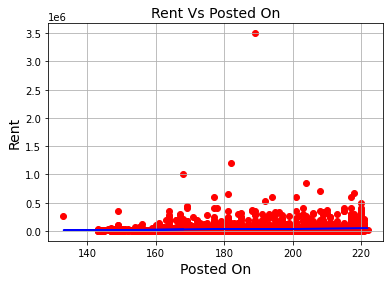

The slope of the best fit for Posted On is 381.409965141933


In [68]:
check_linear_relationship("Posted On")

### BHK

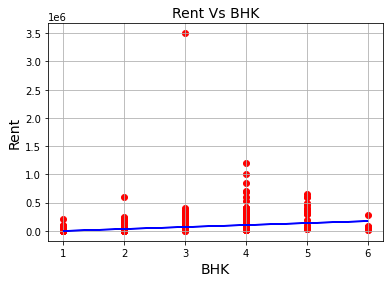

The slope of the best fit for BHK is 34702.721763320005


In [69]:
check_linear_relationship("BHK")

### Size

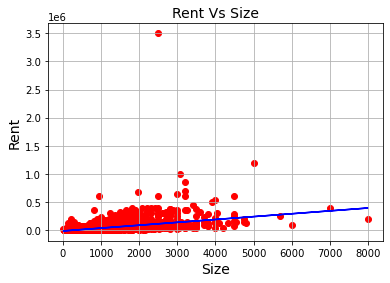

The slope of the best fit for Size is 50.93056286579361


In [70]:
check_linear_relationship("Size")

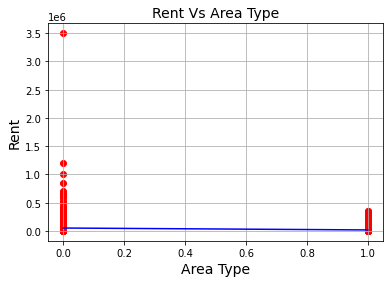

The slope of the best fit for Area Type is -33707.11284392383


In [71]:
check_linear_relationship("Area Type")

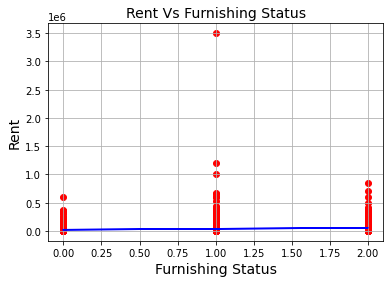

The slope of the best fit for Furnishing Status is 16698.37890721133


In [72]:
check_linear_relationship("Furnishing Status")

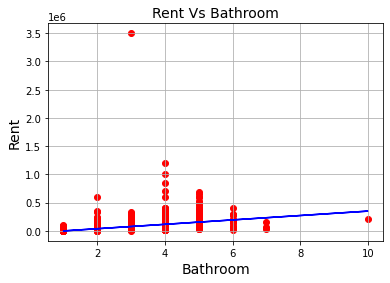

The slope of the best fit for Bathroom is 38964.99742263778


In [73]:
check_linear_relationship("Bathroom")

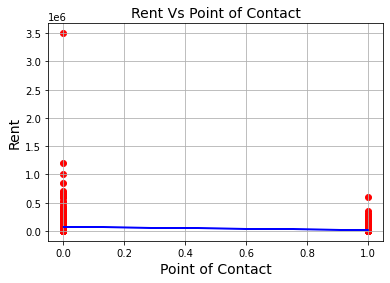

The slope of the best fit for Point of Contact is -56773.09172142984


In [74]:
check_linear_relationship("Point of Contact")

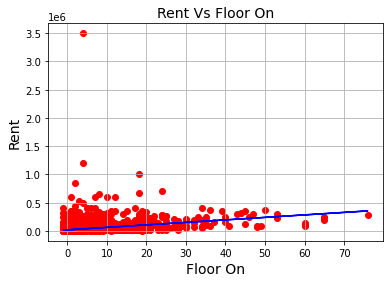

The slope of the best fit for Floor On is 4416.908432565851


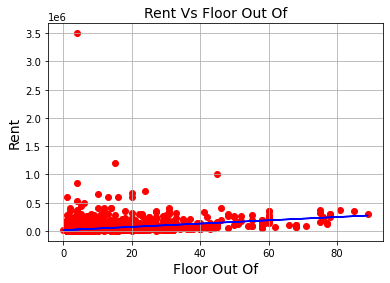

The slope of the best fit for Floor Out Of is 2905.919939181912


In [75]:
check_linear_relationship("Floor On")
check_linear_relationship("Floor Out Of")

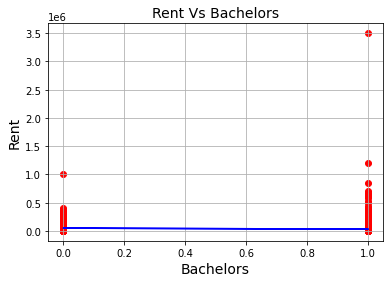

The slope of the best fit for Bachelors is -16669.177673926675


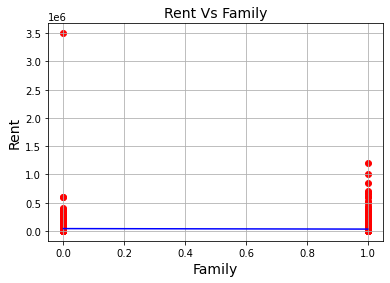

The slope of the best fit for Family is -8646.970311196477


In [76]:
check_linear_relationship("Bachelors")
check_linear_relationship("Family")

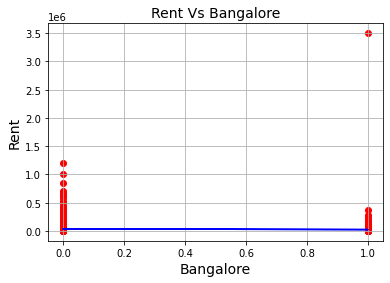

The slope of the best fit for Bangalore is -12350.777168655457


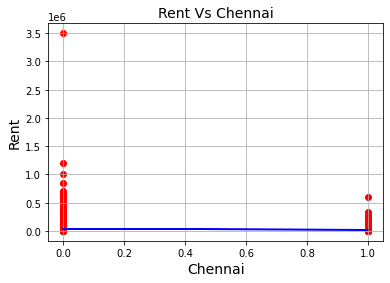

The slope of the best fit for Chennai is -16481.062441349008


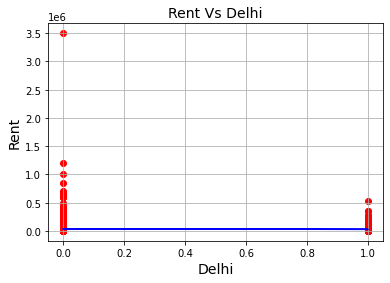

The slope of the best fit for Delhi is -6359.166843087023


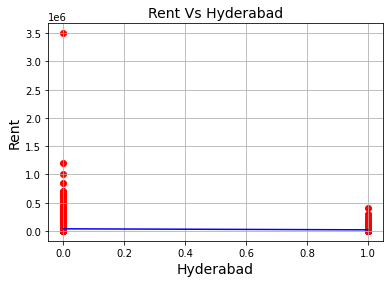

The slope of the best fit for Hyderabad is -17641.901935438953


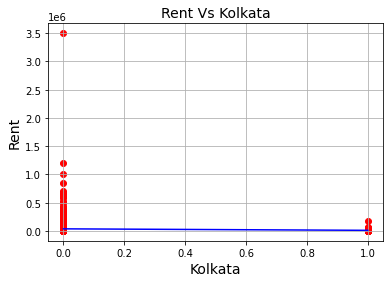

The slope of the best fit for Kolkata is -26266.73650416441


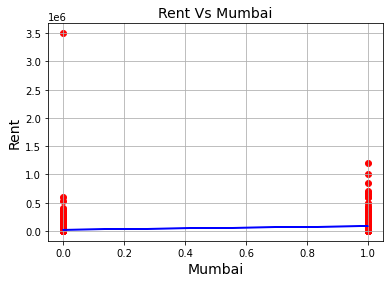

The slope of the best fit for Mumbai is 63279.250608935436


In [77]:
check_linear_relationship("Bangalore")
check_linear_relationship("Chennai")
check_linear_relationship("Delhi")
check_linear_relationship("Hyderabad")
check_linear_relationship("Kolkata")
check_linear_relationship("Mumbai")

### We know now that despite not directly appearing linear, each of our variables has an acceptably strong linear relationship. While the clustered data points make these difficult to see, the best fit lines' slopes indicate the actual trend.

# Model Usability Experimentation and Model Development

**Start here next time!**

*btw: BHK is bathrooms, hallways, and kitchens. Maybe subtract bathrooms from it and use the remainder as another column representing HK (hallways and kitchens). Otherwise we need to deal with multicollinearity from the two variables.*

### To start model development lets begin by looking at the main types of regression techniques we could potentially use.

1. Multiple Linear Regression - By this I mean a regression done with the simple/multiple linear regression model ((((EQUATION -   Y = XB + epsilon)))). Uses OLS or Ordinary Least Squares [SUM:(yHat - y)^2]

2. Neural network regression - This type of model has its advantages, but before testing I think our data sample size is too small from which to learn anything meaningful.

3. Lasso Regression - Uses Least Absolute Shrinkage and Selection Operator in place of the classic OLS. Good for datasets with highly correlated variables which you're having a hard time seperating.

4. Decision Tree or Random Forest Regression - Using either a single main decision tree or a forest of small trees built from random sampling, either case uses these trees to evaluate a sum as the nodes are evaluated which works in the end as a regression.

5. KNN (or other clustering) - Cluster the data using a KNN or other clustering algorithm, and evaluate the value of any newly presented point by taking the mean of the nearby points after the new point is plotted.

6. SVM - SVM's are excellent for both classification and regression due to their use of the kernel trick to create arbitrarily complex domains in which to perform the regression without knowing what those domains are. 

7. Gaussian Process Regression - Models the probability distribution for the domain of all inputs to the function used rather than for any specific inputs. Sounds really nice, and each prediction comes with a uncertainty measure. 

8. Polynomial Regression - Like simple linear regression, but instead of y = x0 + b(x1), the series is increasing polynomials. Therefore, y = x0 + a(x1) + b(x1)^2 + c(x1)^3 + ... n(x1)^n. Seems a little useful, but I have too many variables to use a simple regression model.

### Now we just need to decide actual models to test based on these techniques.

1. Multiple Linear Regression

2. Neural Network Regression

3. Lasso Regression

4. Random Forest Regression

5. K-Means Clustering with an SVM Regression per Cluster
https://blog.paperspace.com/svr-kmeans-clustering-for-regression/

6. SVM with Linear Kernel

7. SVM with Gaussian Kernel

8. SVM with Linear Kernel

### Along with accomplishing initial testing for a basic linear regression model, we can perform PCA to determine if we are using too much information.

In [78]:
columns = data.columns
X = data[columns]
y = data[["Rent"]]
X = X.drop("Rent",axis=1)
X

,Posted On,BHK,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,168,2,1100,1,0,2,1,0,2,0,0,0,0,1,0,1,1
1,163,2,800,1,1,1,1,1,3,0,0,0,0,1,0,1,1
2,166,2,1000,1,1,1,1,1,3,0,0,0,0,1,0,1,1
3,215,2,800,1,0,1,1,1,2,0,0,0,0,1,0,1,1
4,159,2,850,0,0,1,1,1,2,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,168,2,1000,0,1,2,1,3,5,0,0,0,1,0,0,1,1
4739,165,3,2000,1,1,3,1,1,4,0,0,0,1,0,0,1,1
4740,221,3,1750,0,1,3,0,3,5,0,0,0,1,0,0,1,1
4741,217,3,1500,0,1,2,0,23,34,0,0,0,1,0,0,0,1


*First we scale our predictor variables between 0 and 1.*

In [79]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))
X_reduced

array([[-1.67364730e+00,  3.60641034e-01, -4.07787686e-01, ...,
         4.27396013e-01,  6.48111408e-02, -4.29272193e-15],
       [-1.96759968e+00, -2.18057345e-01, -3.25602690e-02, ...,
        -3.61976306e-01,  1.84844947e-02, -5.20262108e-16],
       [-1.85717210e+00, -7.07665007e-02, -7.85675075e-02, ...,
        -4.27679410e-01,  1.35389871e-02, -1.32110627e-16],
       ...,
       [ 1.92262742e+00,  1.79017838e+00, -5.74236164e-01, ...,
         6.91839445e-02, -1.58519595e-01, -1.40720931e-16],
       [ 4.31721398e+00,  5.84963035e-02,  1.97528756e+00, ...,
        -7.49485728e-01, -2.10730821e-01, -1.60255059e-16],
       [-4.58352226e-01,  3.62011834e-01, -9.79998755e-01, ...,
         6.86908352e-02, -1.29472729e-01,  1.12675757e-16]])

*Next we define the cross validation method we will use in our evaluation.*

In [80]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [81]:
regr = LinearRegression()
#regr = RandomForestRegressor()
mse = []

*Next we calculate MSE with only the intercept.*

In [82]:
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()  
mse.append(score)

*Finally we calculate MSE using cross-validation, adding one component at a time.*

In [83]:
for i in np.arange(1, 17):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

*Plot cross-validation results (found using multiple linear regression with MSE)*

[6104547614.166117,
 4499382170.0068035,
 4443398829.43102,
 4440577946.442569,
 4421085808.019679,
 4420956822.910687,
 4423597662.7904215,
 4355665169.162713,
 4353421107.73055,
 4351803302.361875,
 4352829303.72387,
 4303927231.675111,
 4271492958.367032,
 4273510683.9649816,
 4182383856.6134424,
 4183394668.2989635,
 4187222465.889566]

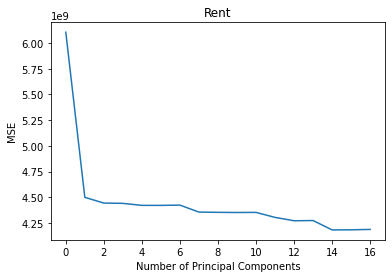

In [84]:
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Rent')
mse

*We can clearly see that each of the principal components reduces the overall MSE of the model except for the last two, meaning we likely have some correlation between some of our variables. This means that next up is testing for correlation or multicollinearity, if the variables are all correlated or if each correlated variable is correlated to a different variable.*

## Testing Variables for Correlation

In [85]:
def get_residuals(data,skl_model,trained):
    y = data["Rent"]
    X = data.drop("Rent",axis=1)
    X_train = X[:int(len(X)*.7)]
    y_train = y[:int(len(X)*.7)]
    X_test = X[int(len(X)*.7):]
    y_test = y[int(len(X)*.7):]
    
    
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    y_train = y_train.reset_index()
    y_test = y_test.reset_index()
    
    
    if not trained:
        skl_model.fit(X_train,y_train)
    
    full_predictions = skl_model.predict(X_test)
    predictions = []
    residuals = []
    
    y_test = y_test.drop("index",axis=1)
    
    for i in range(len(full_predictions)):
        predictions.append(full_predictions[i][1])
    
    for i in range(len(predictions)):
        residuals.append(abs(predictions[i] - y_test["Rent"][i]))
           
    return residuals
                         
resids = get_residuals(data,regr,False)

In [86]:
durbin_watson(resids)

0.9596730213440284

**The durbin_watson statistic being under 1.5 indicates a relatively strong autocorrelation within the used variables.**

This means we now need to test for which of our variables strongly correlate with each other.

In [87]:
#chisquare(data).statistic

#covariance = SUM((xi - avgi)(yj - avgj))/n

def areScalarVariablesCorrelated(data,varA,varB):
    var1 = scale(data[varA])
    var2 = scale(data[varB])
    
    avg1 = var1.mean()
    avg2 = var2.mean()
    
    if len(var1) != len(var2):
        print("Please use variables with the same number of entries.")
        return None
    
    total_sum = 0
    for i in range(len(var1)):
        total_sum = total_sum + (var1[i] - avg1)*(var2[i] - avg2)
    
    return total_sum/len(var1)

In [88]:
data

,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,168,2,10000,1100,1,0,2,1,0,2,0,0,0,0,1,0,1,1
1,163,2,20000,800,1,1,1,1,1,3,0,0,0,0,1,0,1,1
2,166,2,17000,1000,1,1,1,1,1,3,0,0,0,0,1,0,1,1
3,215,2,10000,800,1,0,1,1,1,2,0,0,0,0,1,0,1,1
4,159,2,7500,850,0,0,1,1,1,2,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,168,2,15000,1000,0,1,2,1,3,5,0,0,0,1,0,0,1,1
4739,165,3,29000,2000,1,1,3,1,1,4,0,0,0,1,0,0,1,1
4740,221,3,35000,1750,0,1,3,0,3,5,0,0,0,1,0,0,1,1
4741,217,3,45000,1500,0,1,2,0,23,34,0,0,0,1,0,0,0,1


In [89]:
def scalarCorrelationMatrix(data):
    scalar_columns = ['Posted On','BHK','Size','Bathroom','Floor On','Floor Out Of']

    correlation_columns = []

    for i in scalar_columns:
        list_column = []
        for j in scalar_columns:
            list_column.append(areScalarVariablesCorrelated(data,i,j))
        correlation_columns.append(pd.Series(list_column,name=i,dtype='float64'))

    correlation_frame = pd.concat(correlation_columns,axis=1)
    correlation_frame.index = scalar_columns
    
    return correlation_frame

In [90]:
scalarCorrelationMatrix(data)

,Posted On,BHK,Size,Bathroom,Floor On,Floor Out Of
Posted On,1.000000,0.119176,0.139458,0.160449,0.152949,0.176834
BHK,0.119176,1.000000,0.716056,0.794772,0.223718,0.247828
Size,0.139458,0.716056,1.000000,0.740618,0.169785,0.189510
Bathroom,0.160449,0.794772,0.740618,1.000000,0.330628,0.361870
Floor On,0.152949,0.223718,0.169785,0.330628,1.000000,0.862063
Floor Out Of,0.176834,0.247828,0.189510,0.361870,0.862063,1.000000


**Here the correlation matrix shows the level of correlation between any of the two scalar variables.**

The strongest correlations are as follows:

1. Floor on and Floor Out Of - This correlation is pretty simple, Floor Out Of is the maximum value that Floor On could be, meaning that as Floor Out Of increases, the potential size of Floor On does as well.

    To fix this we could make Floor On into a ratio between current Floor On and Floor Out Of, making the Floor Out Of represent the building size while Floor On will say where in the building it is without scaling linearly along with Floor Out Of.


2. Bathroom and BHK - This correlation makes a lot of sense as well, given that Bathroom tells the number of available bathrooms while BHK tells the number of bathroons, hallways, and kitchens. 

3. Size and Bathroom - The correlation makes sense as the larger a place is, generally the more bathrooms it has and apparently that trend is strong enough to show correlation here.

4. Size and BHK - This is part of the same multicollinear issue with the previous two. 

    To try to fix all three of these we can try this:

    First, scale BHK and Bathroom by Size (BHK/Size,Bathroom/Size).

    Next, update BHK to be itself minus Bathroom.

Check for collinearity after this, should remove correlation with Size for Bathroom and BHK, but still need to see if the processing will affect how the model reads the data.

## Floor

In [91]:
def scaleFloor(data):
    data["Floor On"].astype("float32",copy=False)
    floor_on = data["Floor On"]
    floor_out_of = data["Floor Out Of"]
    for i in range(len(floor_on)):
        if floor_on[i] == 0:
            floor_on[i] = 0
        else:
            floor_on[i] = floor_on[i] / floor_out_of[i]
    data["Floor On"] = floor_on
    
    return data

In [92]:
data

,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,168,2,10000,1100,1,0,2,1,0,2,0,0,0,0,1,0,1,1
1,163,2,20000,800,1,1,1,1,1,3,0,0,0,0,1,0,1,1
2,166,2,17000,1000,1,1,1,1,1,3,0,0,0,0,1,0,1,1
3,215,2,10000,800,1,0,1,1,1,2,0,0,0,0,1,0,1,1
4,159,2,7500,850,0,0,1,1,1,2,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,168,2,15000,1000,0,1,2,1,3,5,0,0,0,1,0,0,1,1
4739,165,3,29000,2000,1,1,3,1,1,4,0,0,0,1,0,0,1,1
4740,221,3,35000,1750,0,1,3,0,3,5,0,0,0,1,0,0,1,1
4741,217,3,45000,1500,0,1,2,0,23,34,0,0,0,1,0,0,0,1


In [93]:
data = scaleFloor(data)
data

,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,168,2,10000,1100,1,0,2,1,0.000000,2,0,0,0,0,1,0,1,1
1,163,2,20000,800,1,1,1,1,0.333333,3,0,0,0,0,1,0,1,1
2,166,2,17000,1000,1,1,1,1,0.333333,3,0,0,0,0,1,0,1,1
3,215,2,10000,800,1,0,1,1,0.500000,2,0,0,0,0,1,0,1,1
4,159,2,7500,850,0,0,1,1,0.500000,2,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,168,2,15000,1000,0,1,2,1,0.600000,5,0,0,0,1,0,0,1,1
4739,165,3,29000,2000,1,1,3,1,0.250000,4,0,0,0,1,0,0,1,1
4740,221,3,35000,1750,0,1,3,0,0.600000,5,0,0,0,1,0,0,1,1
4741,217,3,45000,1500,0,1,2,0,0.676471,34,0,0,0,1,0,0,0,1


In [94]:
scalarCorrelationMatrix(data)

,Posted On,BHK,Size,Bathroom,Floor On,Floor Out Of
Posted On,1.000000,0.119176,0.139458,0.160449,0.046432,0.176834
BHK,0.119176,1.000000,0.716056,0.794772,0.039376,0.247828
Size,0.139458,0.716056,1.000000,0.740618,0.025421,0.189510
Bathroom,0.160449,0.794772,0.740618,1.000000,0.086114,0.361870
Floor On,0.046432,0.039376,0.025421,0.086114,1.000000,0.084283
Floor Out Of,0.176834,0.247828,0.189510,0.361870,0.084283,1.000000


**Dropped from .86 to .084, successfully removed significant correlation from Floor On and Floor Out Of.**

In [95]:
def sizeBathroomBHKScale(data):
    #First scale Bathroom and BHK by Size
    data["Bathroom"].astype("float32",copy=False)
    data["BHK"].astype("float32",copy=False)
    
    bathroom = data["Bathroom"]
    bhk = data["BHK"]
    size = data["Size"]
    
    for i in range(len(bathroom)):
        bhk[i] = bhk[i] - bathroom[i]
    
    for i in range(len(bathroom)):
        if size[i] == 0:
            size[i] = 1
        bathroom[i] = bathroom[i] / size[i]
        #bhk[i] = bhk[i] / size[i]
            
    data["Bathroom"] = bathroom
    data["BHK"] = bhk
    
    return data

In [96]:
data = sizeBathroomBHKScale(data)
data

/var/folders/q9/tdgq365j2tq2_85sl4yvrw7w0000gn/T/ipykernel_9462/3945342241.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhk[i] = bhk[i] - bathroom[i]
/var/folders/q9/tdgq365j2tq2_85sl4yvrw7w0000gn/T/ipykernel_9462/3945342241.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bathroom[i] = bathroom[i] / size[i]


,Posted On,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Floor On,Floor Out Of,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors,Family
0,168,0,10000,1100,1,0,0.001818,1,0.000000,2,0,0,0,0,1,0,1,1
1,163,1,20000,800,1,1,0.001250,1,0.333333,3,0,0,0,0,1,0,1,1
2,166,1,17000,1000,1,1,0.001000,1,0.333333,3,0,0,0,0,1,0,1,1
3,215,1,10000,800,1,0,0.001250,1,0.500000,2,0,0,0,0,1,0,1,1
4,159,1,7500,850,0,0,0.001176,1,0.500000,2,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,168,0,15000,1000,0,1,0.002000,1,0.600000,5,0,0,0,1,0,0,1,1
4739,165,0,29000,2000,1,1,0.001500,1,0.250000,4,0,0,0,1,0,0,1,1
4740,221,0,35000,1750,0,1,0.001714,0,0.600000,5,0,0,0,1,0,0,1,1
4741,217,1,45000,1500,0,1,0.001333,0,0.676471,34,0,0,0,1,0,0,0,1


In [97]:
scalarCorrelationMatrix(data)

,Posted On,BHK,Size,Bathroom,Floor On,Floor Out Of
Posted On,1.000000,-0.077420,0.139458,-0.042398,0.046432,0.176834
BHK,-0.077420,1.000000,-0.107257,-0.040206,-0.078607,-0.206196
Size,0.139458,-0.107257,1.000000,-0.244488,0.025421,0.189510
Bathroom,-0.042398,-0.040206,-0.244488,1.000000,0.034040,-0.031476
Floor On,0.046432,-0.078607,0.025421,0.034040,1.000000,0.084283
Floor Out Of,0.176834,-0.206196,0.189510,-0.031476,0.084283,1.000000


**Now some of our correlation is negative, but the degree is significantly smaller indicating much less correlation between the three variables.**

In [98]:
resids = get_residuals(data,LinearRegression(),False)

In [99]:
durbin_watson(resids)

1.191584884322449

**We've improved our durbin watson statistic from .95 to 1.19, however our goal is still 1.5.**

We have looked close at our scalar variables, now it's time to check our categorical vars.

In [100]:
cat_vars = ["Area Type","Furnishing Status","Point of Contact","Bachelors","Family",
            "Bangalore","Chennai","Delhi","Hyderabad","Kolkata","Mumbai"]

In [112]:
def getCatCorrelation(data):
    result_holder = []
    for i in cat_vars:
        #cat_holder.append(data[i].value_counts())
        for j in cat_vars:
            crosstab, test_results, expected = rp.crosstab(data[i], data[j],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
            result_holder.append([crosstab,test_results,expected])
        
    return result_holder
    
result = getCatCorrelation(data)

**Phi and Cramer's V	Interpretation**

0.25:	Very strong

0.15:	Strong

0.10:	Moderate

0.05:	Weak

0:	No or very weak

    

In [107]:
result

[[          Area Type               
  Area Type         0      1     All
  Area Type                         
  0             48.45   0.00   48.45
  1              0.00  51.55   51.55
  All           48.45  51.55  100.00,
                  Chi-square test  results
  0  Pearson Chi-square ( 1.0) =    4743.0
  1                    p-value =       0.0
  2               Cramer's phi =       1.0,
               Area Type             
  Area Type            0            1
  Area Type                          
  0          1113.388994  1184.611006
  1          1184.611006  1260.388994],
 [                  Furnishing Status                      
  Furnishing Status                 0      1      2     All
  Area Type                                                
  0                             17.54  23.04   7.86   48.45
  1                             20.68  24.41   6.45   51.55
  All                           38.22  47.46  14.32  100.00,
                  Chi-square test  results
  0  Pea

## Correlation Strength per Categorical Variable

In [115]:
def catCorrMatrix(catCorrResults):
    corr_strength = pd.DataFrame()
    corr_strength_constructor = []

    #n is the starting point (index wise) for the current var
    n = 0
    interp = False
    for i in range(len(cat_vars)): 
        corr_strength_helper = []
        for j in range(len(cat_vars)):
            if interp:
                if abs(result[n+j][1]['results'][2]) > .25:
                    #print("Very Strong")
                    corr_strength_helper.append('VS')
                elif abs(result[n+j][1]['results'][2]) > .15:
                    #print("Strong")
                    corr_strength_helper.append('S')
                elif abs(result[n+j][1]['results'][2]) > .1:
                    #print("Moderate")
                    corr_strength_helper.append('M')
                elif abs(result[n+j][1]['results'][2]) > .05:
                    #print("Weak")
                    corr_strength_helper.append('W')
                else:
                    #print("None or Very Weak")
                    corr_strength_helper.append('N')
            else:
                corr_strength_helper.append(result[n+j][1]['results'][2])

        corr_strength_helper = pd.Series(corr_strength_helper,name=cat_vars[i])
        corr_strength = pd.concat([corr_strength,corr_strength_helper],axis=1)

        n = n + len(cat_vars)

    corr_strength.index = cat_vars
    
    return corr_strength

In [117]:
corr_strength = catCorrMatrix(result)
corr_strength

,Area Type,Furnishing Status,Point of Contact,Bachelors,Family,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Area Type,1.0000,0.0584,0.5616,0.1371,0.3207,0.1010,0.1256,0.0277,0.1896,0.0136,0.3669
Furnishing Status,0.0584,1.0000,0.1316,0.0514,0.1048,0.1777,0.0731,0.0193,0.0279,0.1694,0.1493
Point of Contact,0.5616,0.1316,1.0000,0.1414,0.1976,0.1199,0.1767,0.0635,0.1975,0.1265,0.5215
Bachelors,0.1371,0.0514,0.1414,1.0000,0.1531,0.0563,0.0296,0.1039,0.0070,0.0655,0.1558
Family,0.3207,0.1048,0.1976,0.1531,1.0000,0.0285,0.0266,0.0934,0.0712,0.0536,0.0026
Bangalore,0.1010,0.1777,0.1199,0.0563,0.0285,1.0000,0.2303,0.1833,0.2265,0.1689,0.2433
Chennai,0.1256,0.0731,0.1767,0.0296,0.0266,0.2303,1.0000,0.1838,0.2271,0.1694,0.2440
Delhi,0.0277,0.0193,0.0635,0.1039,0.0934,0.1833,0.1838,1.0000,0.1807,0.1348,0.1941
Hyderabad,0.1896,0.0279,0.1975,0.0070,0.0712,0.2265,0.2271,0.1807,1.0000,0.1666,0.2399
Kolkata,0.0136,0.1694,0.1265,0.0655,0.0536,0.1689,0.1694,0.1348,0.1666,1.0000,0.1789


We can see the very strong 

In [140]:
def highlightS(x,color):
    ones = np.where(x > .99, "color: white;", None)
    s = np.where(x > .2, f"color: {color};", None)
    vs = np.where(x > .5, "color: blue;", None)
    for i in range(len(vs)):
        if ones[i] == None:
            if not s[i] == None:
                if vs[i] == None:
                    vs[i] = s[i]
        else:
            vs[i] = ones[i]
    return vs

def highlightN(x,color):
    return np.where((x == "N"), f"color: {color};", None)

In [141]:
corr_strength.style.apply(highlightS,color="green")

,Area Type,Furnishing Status,Point of Contact,Bachelors,Family,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Area Type,1.000000,0.058400,0.561600,0.137100,0.320700,0.101000,0.125600,0.027700,0.189600,0.013600,0.366900
Furnishing Status,0.058400,1.000000,0.131600,0.051400,0.104800,0.177700,0.073100,0.019300,0.027900,0.169400,0.149300
Point of Contact,0.561600,0.131600,1.000000,0.141400,0.197600,0.119900,0.176700,0.063500,0.197500,0.126500,0.521500
Bachelors,0.137100,0.051400,0.141400,1.000000,0.153100,0.056300,0.029600,0.103900,0.007000,0.065500,0.155800
Family,0.320700,0.104800,0.197600,0.153100,1.000000,0.028500,0.026600,0.093400,0.071200,0.053600,0.002600
Bangalore,0.101000,0.177700,0.119900,0.056300,0.028500,1.000000,0.230300,0.183300,0.226500,0.168900,0.243300
Chennai,0.125600,0.073100,0.176700,0.029600,0.026600,0.230300,1.000000,0.183800,0.227100,0.169400,0.244000
Delhi,0.027700,0.019300,0.063500,0.103900,0.093400,0.183300,0.183800,1.000000,0.180700,0.134800,0.194100
Hyderabad,0.189600,0.027900,0.197500,0.007000,0.071200,0.226500,0.227100,0.180700,1.000000,0.166600,0.239900
Kolkata,0.013600,0.169400,0.126500,0.065500,0.053600,0.168900,0.169400,0.134800,0.166600,1.000000,0.178900


From these we can see a lot of strong and very strong correlation between our categorical variables. The main problematic correlations seem to fall into two groups.

The first main group is as follows:

1. Point of Contact and Area Type
2. Point of Contact and Mumbai
3. Mumbai and Area Type
4. Family and Area Type

In addition to these there is a lot of correlation between the different one-hot encoded cities.

5. Bangalore and Mumbai
6. Bangalore and Chennai
7. Bangalore and Hyderabad
8. Chennai and Hyderabad
9. Chennai and Mumbai
10. Hyderabad and Mumbai

**Especially when it comes to the cities there seems to be tons of multicollinearity between all of them other than Delhi and Kolkata. Probably drop all other cities other than one.**